
<center><h3>Does FIFA19 correctly rate the English Premier League Players? (According to the 2017/2018 EPL season)</h3></center>
<hr>

### Author

- Victor Wong (@victorwongyd)


from class Thu 7.00pm

### Executive Summary

FIFA is a popular game that many football fans and even players invest time playing. Many debates come up regarding the accuracy of how Electronic Arts Sports (EA Sports) rates the football players in FIFA. Critics typically challenge the value and ratings that EA Sports tag to a player.

In the end, there is a strong correlation between the total price of a team in FIFA19 and their win rate in real life, and also a strong correlation between the total overall of a team in FIFA19 and their win rate in real life.

### Research Topic & Hypothesis

Describe the topic that you intend to study in your report and what prior beliefs you have about this topic.

In this study, I will first analyse whether a higher price tagged by FIFA of a football team correlates to a higher win rate a team plays in real life.

Also, I will analyse whether the total ratings of each player in a team will influence the success of each game that a team plays in real life.

I believe that a higher total price will correlate to a higher win rate of a team. Also, that a higher total player rating of a team will correlate to a higher win rate of a team.


**Datasets used:**
- EPL Results 1993-2018 — 2007/08–2017/18 ([Link 1](https://www.kaggle.com/thefc17/epl-results-19932018/downloads/epl-results-19932018.zip/1)) retrieved on 18 June 2019
- FIFA 19 complete player dataset ([Link 2](https://www.kaggle.com/karangadiya/fifa19)) retrieved on 18 June 2019



In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [484]:
fifa_df = pd.read_csv("FIFA.csv")
epl_df = pd.read_csv("EPL_Set.csv")

# Cleaning Data
In the English Premier League Dataset, it consists of seasons from 1993 to 2018, however, for the accuracy of FIFA19, we will only take the 2017/2018 season. We will clean the data to form a dataset that can show the percentage win of each EPL team to show how well they played.

In [485]:
def change_name(x):
    if x == 'Huddersfield':
        x = 'Huddersfield Town'
        return x
    elif x == 'Leicester':
        x = 'Leicester City'
        return x
    elif x == 'Man City':
        x = 'Manchester City'
        return x
    elif x == 'Man United':
        x = 'Manchester United'
        return x
    elif x == 'Newcastle':
        x = 'Newcastle United'
        return x
    elif x == 'Stoke':
        x = 'Stoke City'
        return x
    elif x == 'Swansea':
        x = 'Swansea City'
        return x
    elif x == 'Tottenham':
        x = 'Tottenham Hotspur'
        return x
    elif x == 'Brighton':
        x = 'Brighton & Hove Albion'
        return x
    elif x == 'West Ham':
        x = 'West Ham United'
        return x
    else:
        return x

epl_results_df = epl_df[epl_df['Season'] == "2017-18"]

epl_results_df = epl_results_df.copy()
relevant_epl_df = epl_results_df.groupby(['HomeTeam', 'FTR']).size().reset_index(name = 'No. of Games')

relevant_epl_df['FTR'].replace('H','Win', inplace = True)
relevant_epl_df['FTR'].replace('D','Draw', inplace = True)
relevant_epl_df['FTR'].replace('A','Lose', inplace = True)
relevant_epl_df = relevant_epl_df.rename(columns = {"HomeTeam" : "Club"})
relevant_epl_df['Club'] = relevant_epl_df['Club'].apply(change_name)

epl_win_df = relevant_epl_df[relevant_epl_df['FTR'] == 'Win']
epl_lose_df = relevant_epl_df[relevant_epl_df['FTR'] == 'Lose']
epl_draw_df = relevant_epl_df[relevant_epl_df['FTR'] == 'Draw']

relevant_epl_df['Percentage'] = (relevant_epl_df['No. of Games']/19)*100
epl_win1_df = relevant_epl_df[relevant_epl_df['FTR'] == 'Win']
epl_win1_df = epl_win1_df.sort_values(by = 'Club').reset_index()
epl_win1_df = epl_win1_df.drop(columns = ['index', 'FTR', 'No. of Games'])

From the following graph, we can see how each EPL team performed in the 2017/2018 season.

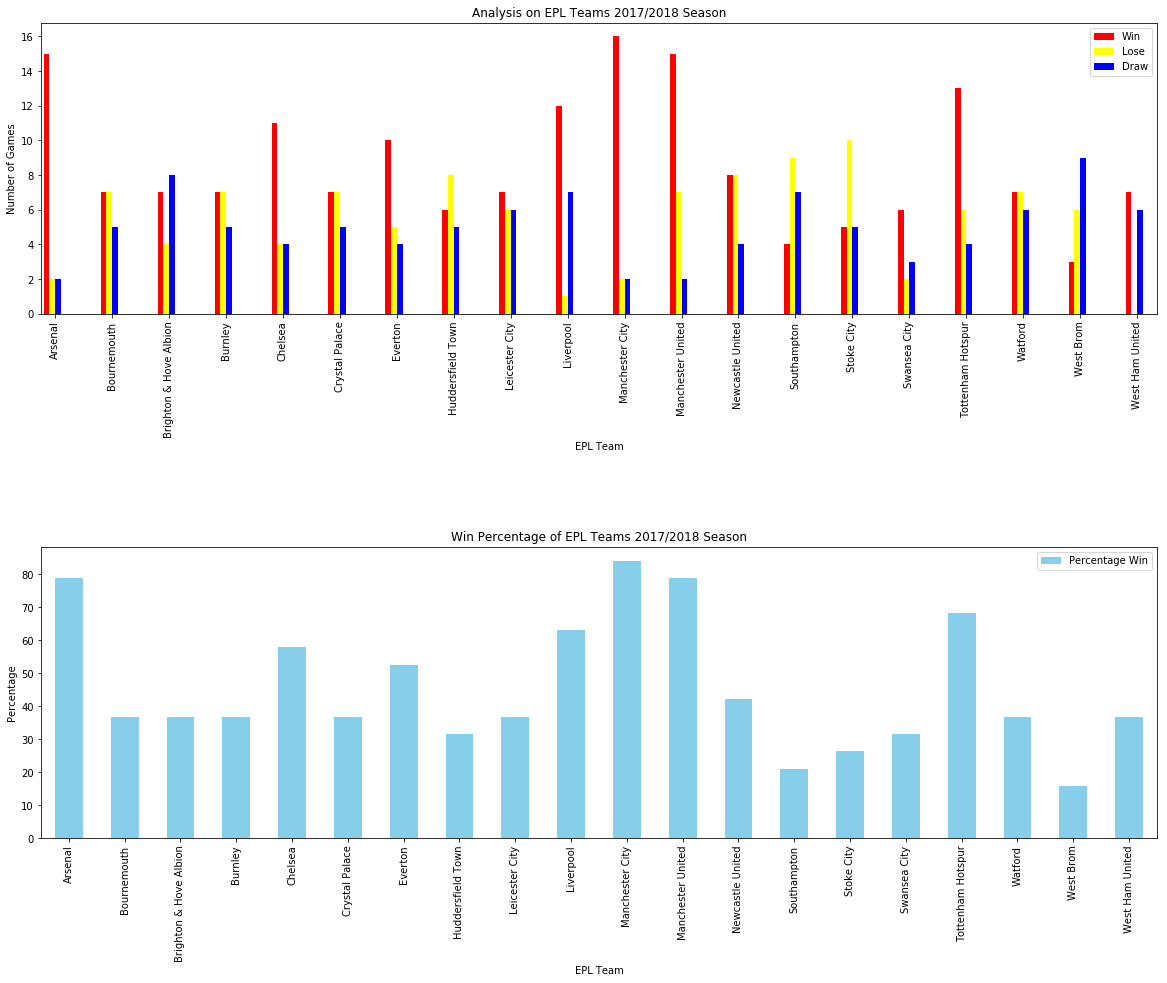

In [486]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

epl_win_df.plot(kind = 'bar', x='Club', y = 'No. of Games', ax=ax, color = 'red', position = 2, width = 0.10)
epl_lose_df.plot(kind = 'bar', x='Club', y = 'No. of Games', ax=ax, color = 'yellow', position = 1, width = 0.10)
epl_draw_df.plot(kind = 'bar', x='Club', y = 'No. of Games', ax=ax, color = 'blue', position = 0, width = 0.10)

ax.set_title('Analysis on EPL Teams 2017/2018 Season')
ax.set_xlabel('EPL Team')
ax.set_ylabel('Number of Games')
ax.legend(['Win', 'Lose', 'Draw'])

epl_win1_df.plot(kind = 'bar', x='Club', y = 'Percentage', ax = ax1, color = 'skyblue')
ax1.set_title('Win Percentage of EPL Teams 2017/2018 Season')
ax1.set_xlabel('EPL Team')
ax1.set_ylabel('Percentage')
ax1.legend(['Percentage Win'])

plt.subplots_adjust(hspace = 0.8)
plt.show()

In the FIFA Dataset, there are players that are not in the EPL teams. I will remove those that are not in the EPL and create 2 datasets for the Total Overall of a team and also Total Value of a team.

In [490]:
epl_teams = ['Chelsea', 'Liverpool', 'Arsenal','Everton', 'Crystal Palace', 
             'Watford', 'Burnley', 'Southampton', 'Bournemouth', 'Manchester United', 
             'Manchester City', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers', 
             'Leicester City', 'Newcastle United', 'Brighton & Hove Albion', 'Swansea City', 'Huddersfield Town',
             'Stoke City']

def value_to_float(x):
    x = x.replace('€','')
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

relevant_fifa_df = fifa_df.copy()
relevant_fifa_df = relevant_fifa_df[relevant_fifa_df['Club'].isin(epl_teams)]
relevant_fifa_df = relevant_fifa_df[['Name', 'Overall', 'Club', 'Value']].copy()
relevant_fifa_df['Value'] = relevant_fifa_df['Value'].apply(value_to_float)
relevant_fifa_df = relevant_fifa_df.sort_values(by = 'Club')

overall_fifa_df = relevant_fifa_df.groupby(['Club'])['Overall'].sum().reset_index(name = 'Total Overall')
overall_fifa_df = pd.DataFrame(overall_fifa_df)

value_fifa_df = relevant_fifa_df.groupby(['Club'])['Value'].sum().reset_index(name = 'Total Value')
value_fifa_df['Total Value'] = value_fifa_df['Total Value'] / 1000000
value_fifa_df = pd.DataFrame(value_fifa_df)

From the following graphs, we can compare between each EPL Team for their the Total Overall and Total Value in FIFA19

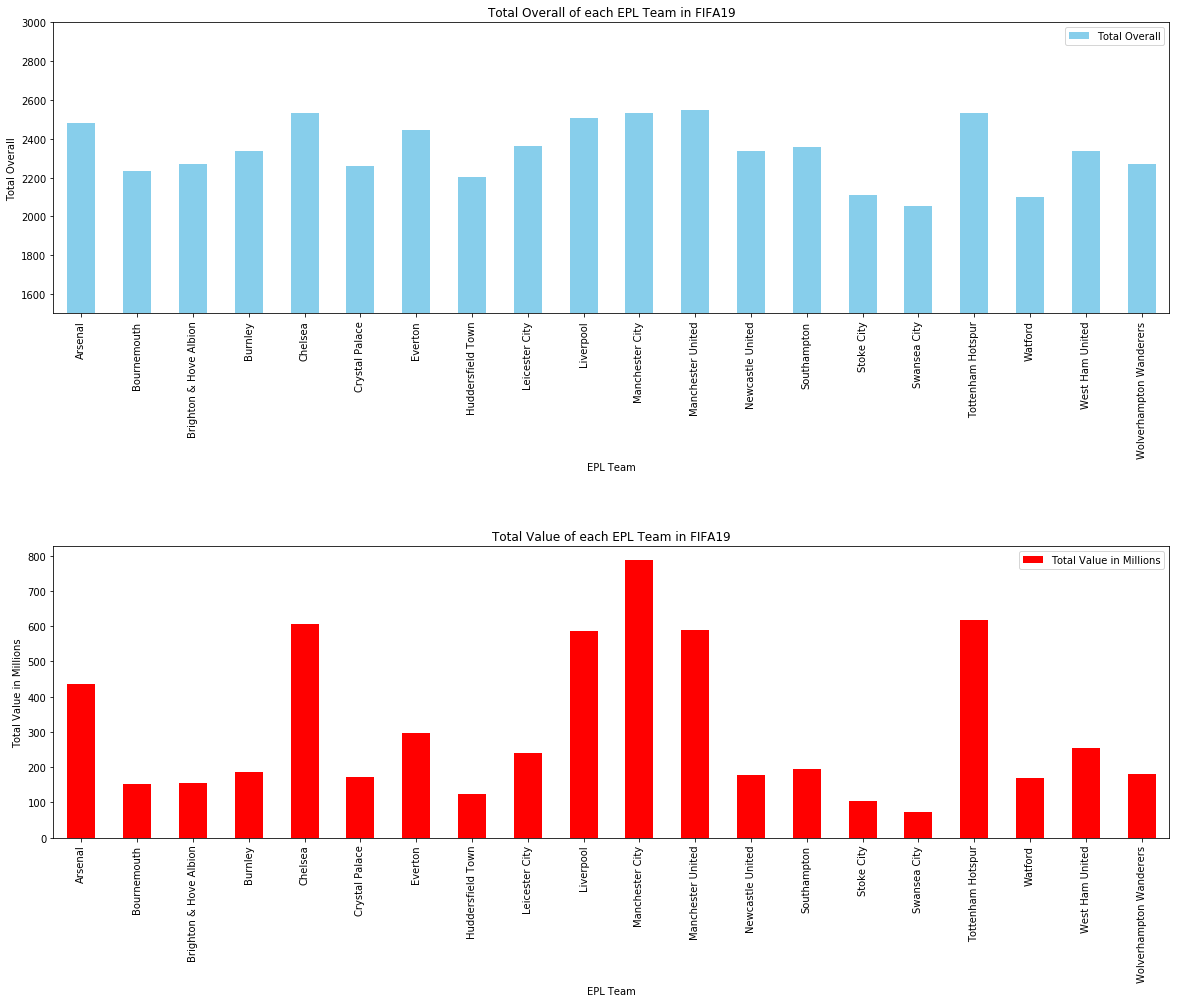

In [491]:
fig = plt.figure(figsize=(20,15))
ax2 = fig.add_subplot(211)
ax3 = fig.add_subplot(212)

overall_fifa_df.plot(kind = 'bar', x='Club', y = 'Total Overall', ax = ax2, color = 'skyblue')
ax2.set_title('Total Overall of each EPL Team in FIFA19')
ax2.set_xlabel('EPL Team')
ax2.set_ylabel('Total Overall')
ax2.set_ylim([1500,3000])

value_fifa_df.plot(kind = 'bar', x='Club', y = 'Total Value', ax = ax3, color = 'red')
ax3.set_title('Total Value of each EPL Team in FIFA19')
ax3.set_xlabel('EPL Team')
ax3.set_ylabel('Total Value in Millions')
ax3.legend(['Total Value in Millions'])


plt.subplots_adjust(hspace = 0.8)
plt.show()

# Analysis based on Overall Points given by FIFA19

0.7566954971682781
0.865068918196377


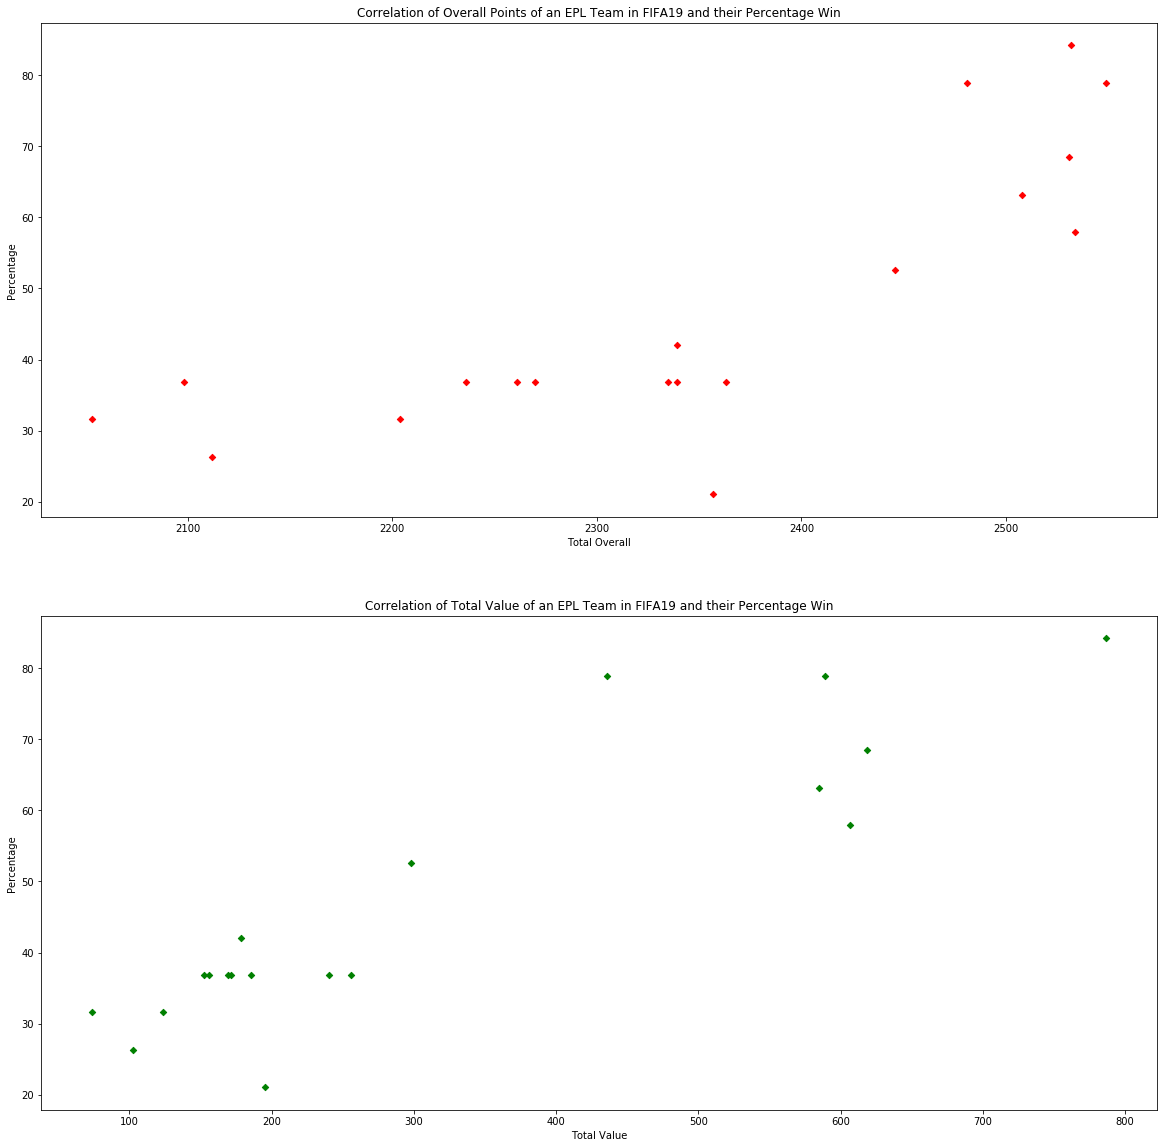

In [489]:
merge1_df = overall_fifa_df.merge(epl_win1_df, on = 'Club')
merge2_df = value_fifa_df.merge(epl_win1_df, on = 'Club')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)


merge1_df.plot(kind = 'scatter', x='Total Overall', y = 'Percentage', ax = ax, marker = 'D', color = 'red',
               title = 'Correlation of Overall Points of an EPL Team in FIFA19 and their Percentage Win')

merge2_df.plot(kind = 'scatter', x='Total Value', y = 'Percentage', ax=ax1, marker = 'D', color = 'green',
               title = 'Correlation of Total Value of an EPL Team in FIFA19 and their Percentage Win')

print(overall_fifa_df['Total Overall'].corr(epl_win1_df['Percentage']))
print(value_fifa_df['Total Value'].corr(epl_win1_df['Percentage']))

#tech_shares_df['GOOG_Close'].corr(tech_shares_df['AAPL_Close'])
plt.show()

# **Conclusion**: 

With a (Pearson) correlation $\rho=0.757$, the Total Overall of a team and their Win Percentage have a strong correlation.

Also, with a (Pearson) correlation $\rho=0.865$, the Total Value of a team and their Win Percentage have a strong correlation.

Although a strong correlation does not imply causation, the correlation between each of the 2 factors show that a High Overall of a Team in FIFA19 will likely have a higher Win Percentage and also a High Total Value of a Team in FIFA19 will likely have a higher Win Percentage.


In [ ]:
# Executive summary: 2 / 3
# Problem Statement: 3 / 3
# Methodology      : 10 /14

# Very interesting project, and also sound analysis.

# Overall: 15/20